#Intro to neural network with regression in tenserflow



In [ ]:
#Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


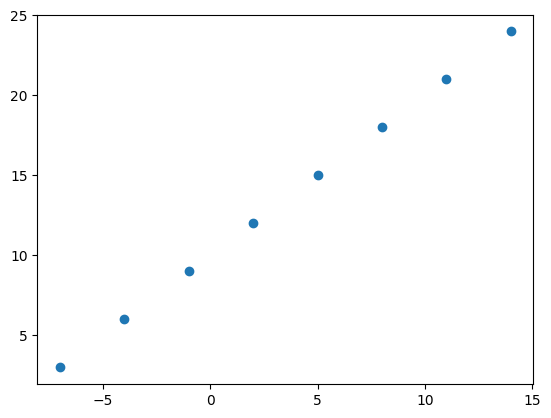

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features (input feature)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0 , 14.0]) #indepent variables

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) #dependent variables

#visualize
plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

#Input and output shapes

In [ ]:
house_info = tf.constant(["bedroom", "bathroom", "Garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'Garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]


(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape
X.shape, y.shape

((8,), (8,))

#Turn our numpy arrays into tensors

In [ ]:
X =tf.cast(tf.constant(X), dtype = tf.float16)
y = tf.cast(tf.constant(y), dtype = tf.float16)
X,y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
X,y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

## steps in modelling of tensorflow

1. **Creating a model**-define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**-define the loss funtion (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model**-letting the model try to find patterns between X & y (features and labels).

In [ ]:
#create randome seed
tf.random.set_seed(42)

#1. create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. compile the model
model.compile(loss = tf.keras.losses.mae, # mae stands for mean average error
              optimizer = tf.keras.optimizers.SGD(),# SGD stands for Schotastic gradient descent
              metrics = ['mae']
              )

#3 fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 447ms/step - loss: 12.2019 - mae: 12.2019
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 12.0694 - mae: 12.0694
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.9369 - mae: 11.9369
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 11.8044 - mae: 11.8044
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 11.6719 - mae: 11.6719


1. Construct or import a pretrained model relevant to your problem

2. Compile the model (prepare it to be used with data)

• Loss-how wrong your model's predictions are compared to the truth labels (you want to minimise this).

• Optimizer-how your model should update its internal patterns to better its predictions.

Metrics-human interpretable values for how well your model is

doing.

3. Fit the model to the training data so it can discover patterns

• Epochs-how many times the model will go through all of the training examples.

4. Evaluate the model on the test data (how reliable are our model's

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 103ms/step


array([[9.329871]], dtype=float32)

In [ ]:

# another way to create models
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,))

In [ ]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [ ]:
y_pred + 7.5403

array([[16.87017]], dtype=float32)

##Improve our model

We can improve our model, by altering the steps we took to create a model.



1. *Creating a model*= here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.



2. *Compiling a model*= here we might change the optimization function or perhaps the *learning rate* of the optimization function.

3. *Fitting a model*= here we might fit a model for more *epochs* (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:

#lets rebuild the model


model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ['mae'])
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 437ms/step - loss: 20.1214 - mae: 20.1214
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 20.1154 - mae: 20.1154
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 20.1094 - mae: 20.1094
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 20.1034 - mae: 20.1034
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 20.0974 - mae: 20.0974
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 20.0914 - mae: 20.0914
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 20.0854 - mae: 20.0854
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 20.0794 - mae: 20.0794
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 20.0734 - mae: 20.0734
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 20.0674 - mae: 20.0674
Epoch 11/100
1/1 [==============================

In [ ]:
X,y


(<tf.Tensor: shape=(8,), dtype=float16, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float16)>,
 <tf.Tensor: shape=(8,), dtype=float16, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16)>)

In [ ]:
#check if the model is improved
model.predict([17.0])

1/1 [==============================] - 0s 160ms/step


array([[-22.069248]], dtype=float32)

###larger model

In [ ]:
#create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
              metrics = ['mae']
              )
#fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.3933 - mae: 14.3933
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 14.0126 - mae: 14.0126
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 13.6930 - mae: 13.6930
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 13.4062 - mae: 13.4062
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1125 - mae: 13.1125
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 12.8116 - mae: 12.8116
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5189 - mae: 12.5189
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 12.2235 - mae: 12.2235
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 11.9265 - mae: 11.9265
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 11.6214 - mae: 11.6214
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 204ms/step


array([[31.658995]], dtype=float32)

#Evaluating Model

In [ ]:
#Make a bigger data set
X = tf.range(-100,100,4) #independent variable
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#Make labels for data set
y = X +10 #dependent variables or labels
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

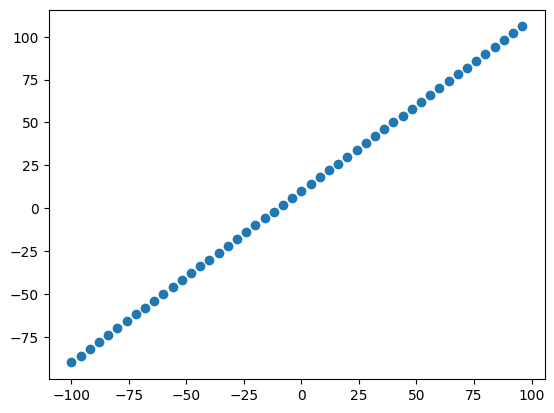

In [ ]:
#visulaize the data
import matplotlib.pyplot as plt
plt.scatter (X,y)

In [ ]:
#length of how many samples
tf.shape(X)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([50], dtype=int32)>

In [ ]:
X_train = X[:40] # 80% of the original datat of x and y
y_train = y[:40]
X_test = X[40:]# remaining 20% of data
y_test = y[40:]

In [ ]:
len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

###Visualizing the data

now we got the training and test sets visulaize them

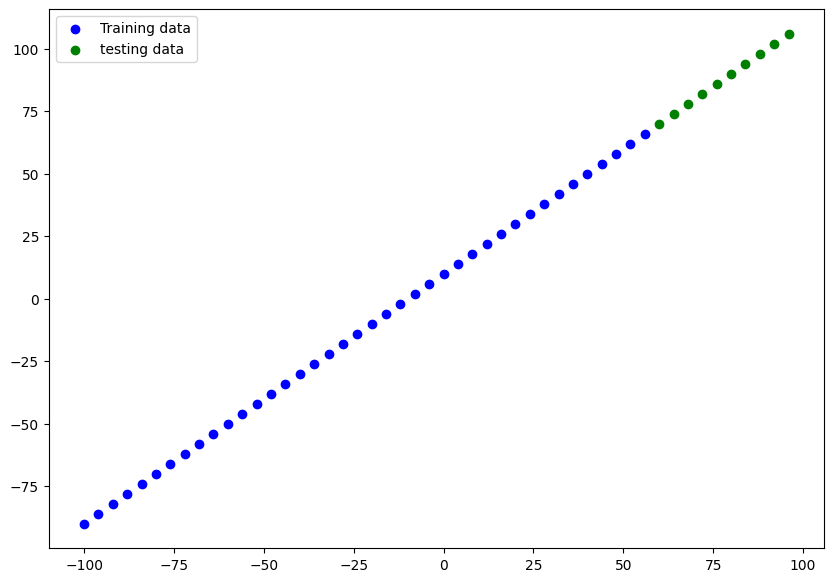

In [ ]:
plt.figure(figsize = (10,7))
#plot training data in blue
plt.scatter(X_train,y_train,c = 'b', label = 'Training data')
#plot test data in green
plt.scatter(X_test, y_test, c= 'g', label = "testing data")
plt.legend()


In [ ]:
#lets have a look at how make nueral network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae']
              )
# model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

###visualizing the model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="InputLayer"),
    tf.keras.layers.Dense(1, name="OutputLayer"),
], name="Model_1")

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Summary of the model
model.summary()


Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 10)                20        
                                                                 
 OutputLayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Dense)          (None, 10)                20        
                                                                 
 OutputLayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params total number of parameters in the model.

* Trainable parameters these are the parameters (patterns) the model can update as it trains.

* Non-trainable params these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during *transfer learning*

In [ ]:
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose =0)

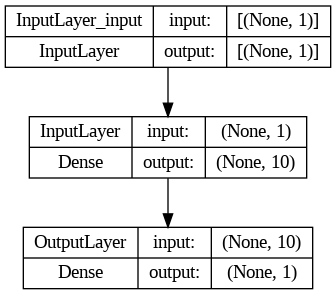

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes = True )

###visualize our models predictions

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[ 78.27248 ],
       [ 83.37213 ],
       [ 88.471794],
       [ 93.57145 ],
       [ 98.6711  ],
       [103.77076 ],
       [108.87041 ],
       [113.97007 ],
       [119.06973 ],
       [124.16937 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

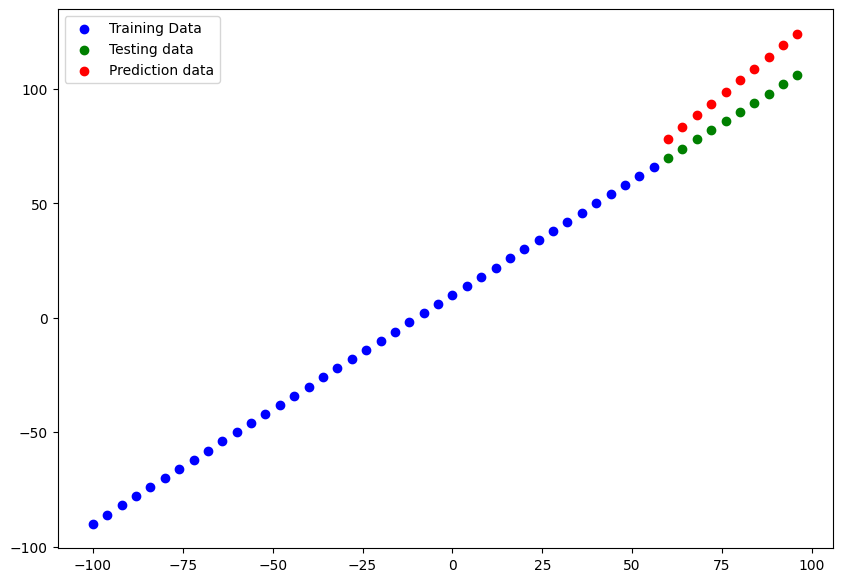

In [ ]:
#create a plotting functions
def plot_predictions(X_train, y_train, X_test, y_test, predictions):
  """
  plots training data, test data, and compares predictions to the truth table
  """

  plt.figure(figsize = (10,7))
  #plot the training data in blue
  plt.scatter(X_train,y_train, c ='b', label = "Training Data")
  #plot the Test data in green
  plt.scatter(X_test, y_test, c = 'g', label = "Testing data")
  #plot models predictions in the data set
  plt.scatter(X_test, predictions, c ='r', label = 'Prediction data')

  #show the legend
  plt.legend() # to show labels


plot_predictions(X_train, y_train, X_test, y_test, y_pred)

#evaluate our models predictions with evaluation metrics

In [ ]:
#Evaluate

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 127ms/step - loss: 13.2209 - mae: 13.2209


[13.220929145812988, 13.220929145812988]

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.27248 ],
       [ 83.37213 ],
       [ 88.471794],
       [ 93.57145 ],
       [ 98.6711  ],
       [103.77076 ],
       [108.87041 ],
       [113.97007 ],
       [119.06973 ],
       [124.16937 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#cal the absolute error
tf.metrics.mean_absolute_error(y_test,tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.29101 , 10.525574, 10.      , 10.71429 , 12.802658, 16.216608,
       20.870407, 25.970068, 31.069733, 36.169373], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.27248 ,  83.37213 ,  88.471794,  93.57145 ,  98.6711  ,
       103.77076 , 108.87041 , 113.97007 , 119.06973 , 124.16937 ],
      dtype=float32)>

In [ ]:
#again cal the mae
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred)) #shape of y_test as well as y_pred should be equal that is wht squeezed is used to remove the wxtra shape 1

<tf.Tensor: shape=(), dtype=float32, numpy=13.220929>

In [ ]:
#calculate the mean square error
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred)) #mse is typically higher as it is squared

<tf.Tensor: shape=(), dtype=float32, numpy=184.76921>

In [ ]:
#make some reusable functions
def mae(y_test, y_pred):
  ''' use tf.squeeze for prediction data '''
  return tf.metrics.mean_absolute_error(y_test, y_pred)

def mse(y_test, y_pred):
  ''' use tf.squeeze for prediction data '''
  return tf.metrics.mean_squared_error(y_test, y_pred)


#Running experiments to improve our model




###**model_1 - same as original model, 1 layer , trained for 100 epochs**

In [ ]:
#set random seed
tf.random

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 66.2627 - mae: 66.2627
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 31.1533 - mae: 31.1533
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 10.0336 - mae: 10.0336
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.3158 - mae: 12.3158
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 11.3707 - mae: 11.3707
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4913 - mae: 10.4913
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 9.4596 - mae: 9.4596
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.3201 - mae: 9.3201
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5375 - mae: 7.5375
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 12.5753 - mae: 12.5753
Epoch 11/100
2/2 [==============================] - 0s 8ms/st

In [ ]:
#make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
y_preds_1


1/1 [==============================] - 0s 66ms/step


array([[56.473038],
       [60.152325],
       [63.83161 ],
       [67.5109  ],
       [71.190186],
       [74.86948 ],
       [78.54876 ],
       [82.22804 ],
       [85.90733 ],
       [89.58662 ]], dtype=float32)

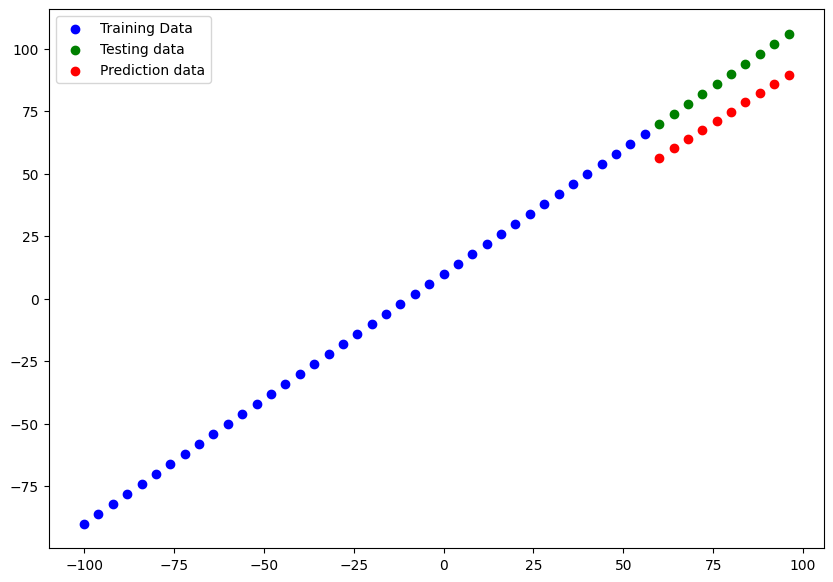

In [ ]:
plot_predictions(X_train,y_train, X_test, y_test, y_preds_1)

In [ ]:
#create model 1 evaluation metrice
model_1.evaluate(y_test, tf.squeeze(y_preds_1))

1/1 [==============================] - 0s 139ms/step - loss: 9.1982 - mae: 9.1982


[9.198214530944824, 9.198214530944824]

In [ ]:
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=224.95459>

In [ ]:
mae_1= mae(y_test,tf.squeeze(y_preds_1))
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=14.970172>

###**model_2 - 2 dense layers trained for 100 epochs**

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train , axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 15.1181 - mae: 15.1181
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 27.5042 - mae: 27.5042
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 20.3471 - mae: 20.3471
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.7564 - mae: 14.7564
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 21.1216 - mae: 21.1216
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 7.6412 - mae: 7.6412
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.0998 - mae: 12.0998
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 13.2175 - mae: 13.2175
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 35.1751 - mae: 35.1751
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 24.4961 - mae: 24.4961
Epoch 11/100
2/2 [==============================] - 0s 12ms

In [ ]:
y_preds_2 = model_2.predict(X_test)
y_preds_2

1/1 [==============================] - 0s 117ms/step


array([[ 76.57645 ],
       [ 81.56616 ],
       [ 86.55587 ],
       [ 91.545586],
       [ 96.5353  ],
       [101.52502 ],
       [106.51473 ],
       [111.50443 ],
       [116.49415 ],
       [121.48387 ]], dtype=float32)

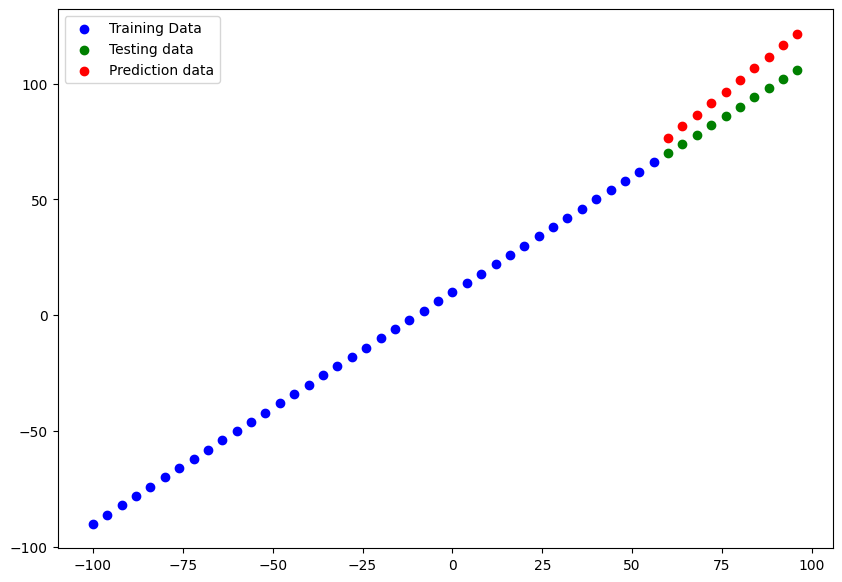

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test, y_preds_2)

In [ ]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_2))
#or you can use function mae()
mae_2 = mae(y_test,tf.squeeze(y_preds_2))

In [ ]:
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_2))
#or you can use function mse()
mse_2 = mse(y_test, tf.squeeze(y_preds_2))

### **model_3 = 2 layers trained for 500 epochs**

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10 ), #using activation = "relu" brings the graph more smooth
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)


Epoch 1/500
2/2 [==============================] - 1s 13ms/step - loss: 36.0138 - mae: 36.0138
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 28.8187 - mae: 28.8187
Epoch 3/500
2/2 [==============================] - 0s 13ms/step - loss: 26.8815 - mae: 26.8815
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 14.8460 - mae: 14.8460
Epoch 5/500
2/2 [==============================] - 0s 9ms/step - loss: 21.9793 - mae: 21.9793
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1173 - mae: 11.1173
Epoch 7/500
2/2 [==============================] - 0s 11ms/step - loss: 12.1520 - mae: 12.1520
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 10.9365 - mae: 10.9365
Epoch 9/500
2/2 [==============================] - 0s 12ms/step - loss: 38.2240 - mae: 38.2240
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 25.7782 - mae: 25.7782
Epoch 11/500
2/2 [==============================] - 0s

In [ ]:
y_pred_3 = model_3.predict(X_test)
y_pred_3

1/1 [==============================] - 0s 72ms/step


array([[16.911219],
       [17.742222],
       [18.573225],
       [19.40423 ],
       [20.235233],
       [21.066238],
       [21.897242],
       [22.728245],
       [23.559246],
       [24.390253]], dtype=float32)

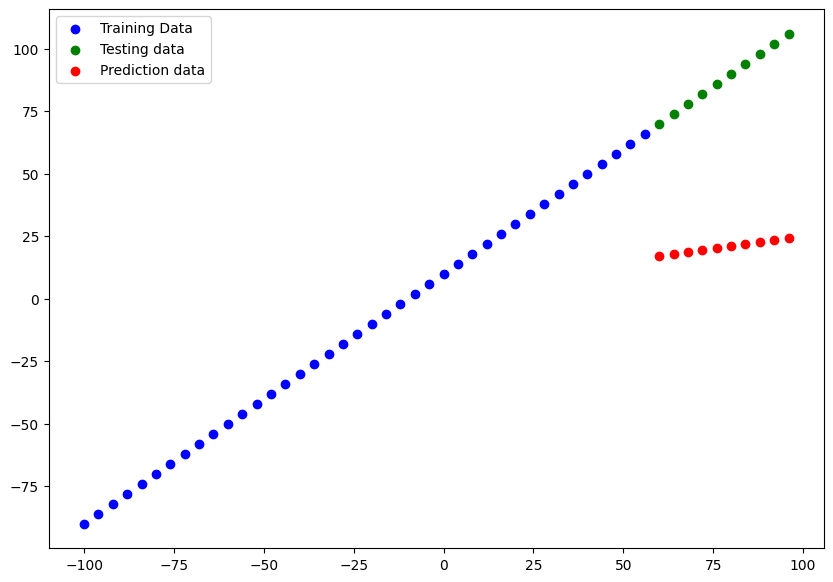

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred_3)

In [ ]:
mae_3 = mae(y_test, tf.squeeze(y_pred_3))
mae_3

<tf.Tensor: shape=(), dtype=float32, numpy=67.349266>

In [ ]:
mse_3= mse(y_test, tf.squeeze(y_pred_3))
mse_3

<tf.Tensor: shape=(), dtype=float32, numpy=4618.7744>

#Comparing the results of our experiment

In [ ]:
import pandas as pd

In [ ]:
model_results= {"model_1" : [mae_1.numpy(),mse_1.numpy()],
                "model_2": [mae_2.numpy(), mse_2.numpy()],
                "model_3" : [mae_3.numpy(), mse_3.numpy()]}



In [ ]:
model_df = pd.DataFrame(model_results)
model_df.index = ['mae',"mse"]
model_df


,model_1,model_2,model_3
mae,14.970172,11.030157,67.349266
mse,224.954590,129.745514,4618.774414


**Note**: one of your main goal should be to minimizethe time between your experiments, the more experiment you do , the more things you will figure out.

## Saving Our Models


there are two main formats:
1. the SavedModel format
2. the HDF5 format

In [ ]:
#save model using SavedModel format
model_2.save(filepath = "best_model_SavedModel_format") # its saved in files with naem best_model.....
#mentioning filepath is not important

In [ ]:
#save model using HDF5 fromat
model_2.save(filepath = "best_model_HDF5_model.h5") # add .h5

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Loading the saved models

In [ ]:
#loading saved model
load_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format") #in brackets enter path
load_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#compare SavedModel and Model_2 predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedModel_pred = load_SavedModel_format.predict(X_test)

model_2_pred == loaded_SavedModel_pred



1/1 [==============================] - 0s 64ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#comparing mae of savedmodel and model_2
mae(y_test, tf.squeeze(model_2_pred)) == mae(y_test, tf.squeeze(loaded_SavedModel_pred ))

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
#loading HDF5 model
load_HDF5_model = tf.keras.models.load_model("/content/best_model_HDF5_model.h5")
load_HDF5_model.summary( )

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# checking predictions of hdf5
model_2_preds = model_2.predict(X_test)
load_HDF5_predict= load_HDF5_model.predict(X_test)
model_2_preds == load_HDF5_predict

1/1 [==============================] - 0s 82ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

#Download a model (or any other file ) from google colab

1. you can go to the filrs tab and right click on the file youre after and click "download"

2. use code(below)

In [ ]:
#download within system
from google.colab import files

#files.download("/content/best_model_HDF5_model.h5")

In [ ]:
#to google drive
#!cp /content/best_model_HDF5_model.h5 /content/drive/MyDrive/ColabNotebooks

In [ ]:
#!ls /content/drive/MyDrive/ColabNotebooks

#A Larger Example

In [ ]:
#import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#reading in insurance datat set using panda
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


###using pd.get_dummies() to one hot encode in panda data frame

In [ ]:
#one-hot encoding in pandas dataframe
insurance_onehot = pd.get_dummies(insurance, dtype=int) #dtype is imortants or else it coverts into True/False

#use astype to convert dtype as an external option

insurance_onehot = insurance_onehot.astype(int)

insurance_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


In [ ]:
#Create X and y values( features and labels)
X = insurance_onehot.drop("charges", axis = 1)
y = insurance_onehot["charges"]

In [ ]:
#view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [ ]:
#view y
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: charges, dtype: int64

**https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html** Documentation for sklearn

In [ ]:
#create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
132,53,35,2,1,0,1,0,0,0,0,1
508,24,25,0,1,0,1,0,1,0,0,0
422,40,32,1,0,1,0,1,1,0,0,0
613,34,19,3,1,0,1,0,1,0,0,0
1111,38,38,3,0,1,0,1,0,0,1,0


In [ ]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
736,37,38,0,1,0,0,1,0,0,1,0
561,54,32,0,1,0,1,0,1,0,0,0
930,26,46,1,0,1,1,0,0,0,1,0
271,50,34,2,0,1,0,1,0,0,0,1
933,45,35,0,1,0,1,0,0,0,0,1


###model 1

In [ ]:
#create a model
tf.random.set_seed(42)

#create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#fcompile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#fit the model
insurance_model.fit(tf.expand_dims(X_train , axis = -1), y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13275.1484 - mae: 13275.1484
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12381.8906 - mae: 12381.8906
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12182.7539 - mae: 12182.7539
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12110.2422 - mae: 12110.2422
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12002.6055 - mae: 12002.6055
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11825.6670 - mae: 11825.6670
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11519.4590 - mae: 11519.4590
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 11017.7764 - mae: 11017.7764
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10389.2979 - mae: 10389.2979
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9765.796

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8455.9746 - mae: 8455.9746


[8455.974609375, 8455.974609375]

In [ ]:
y_pred = insurance_model.predict(X_train)
y_pred.mean()



34/34 [==============================] - 0s 2ms/step


8912.83

###impove our model

1. add extra layer with more hidden units
2. train for longer





###model2

In [ ]:


tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics= ['mae'])

insurance_model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100, verbose = 0)


In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8459.3945 - mae: 8459.3945


[8459.39453125, 8459.39453125]

###model 3

In [ ]:


tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics= ['mae'])

history = insurance_model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=400)


Epoch 1/400
34/34 [==============================] - 1s 3ms/step - loss: 13339.6416 - mae: 13339.6416
Epoch 2/400
34/34 [==============================] - 0s 3ms/step - loss: 13316.2168 - mae: 13316.2168
Epoch 3/400
34/34 [==============================] - 0s 3ms/step - loss: 13271.8477 - mae: 13271.8477
Epoch 4/400
34/34 [==============================] - 0s 3ms/step - loss: 13191.7754 - mae: 13191.7754
Epoch 5/400
34/34 [==============================] - 0s 3ms/step - loss: 13060.4492 - mae: 13060.4502
Epoch 6/400
34/34 [==============================] - 0s 3ms/step - loss: 12868.3477 - mae: 12868.3477
Epoch 7/400
34/34 [==============================] - 0s 3ms/step - loss: 12628.3135 - mae: 12628.3135
Epoch 8/400
34/34 [==============================] - 0s 3ms/step - loss: 12369.3945 - mae: 12369.3945
Epoch 9/400
34/34 [==============================] - 0s 3ms/step - loss: 12178.5664 - mae: 12178.5664
Epoch 10/400
34/34 [==============================] - 0s 3ms/step - loss: 12109.75

In [ ]:

insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8463.5225 - mae: 8463.5225


[8463.5224609375, 8463.5224609375]

###plot history in PANDA

Text(0, 0.5, 'loss')

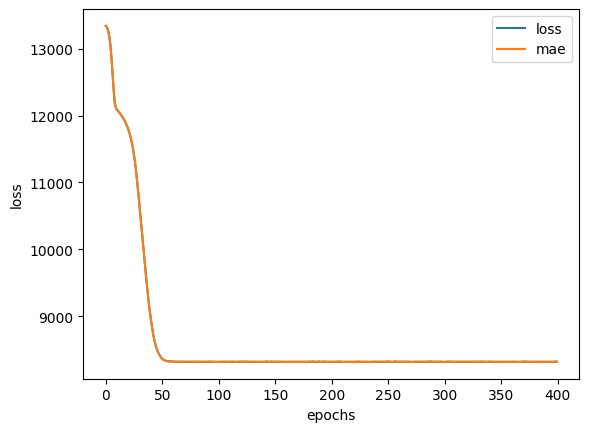

In [ ]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

**How long should you traing for? **
it depends ... so tf has a solution called tensorflow EarlyToppingCallback

#Preprocessing data (normalization and standardization)

normalizing data dosent necesarily imporve data but its worth trying

Scaling values prefer more of normalization

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,0,1,1,0,0,1,0,0
1334,18,31,0,1,0,1,0,1,0,0,0
1335,18,36,0,1,0,1,0,0,0,1,0
1336,21,25,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

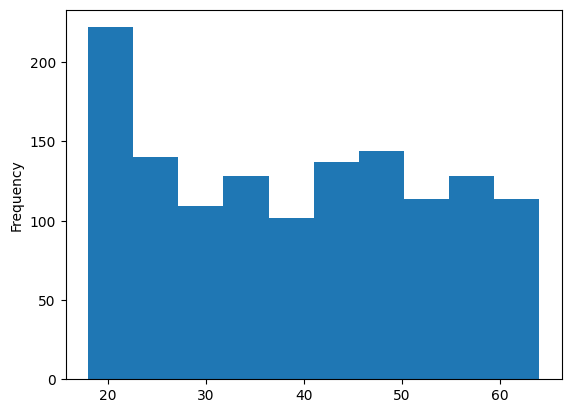

In [ ]:
X["age"].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

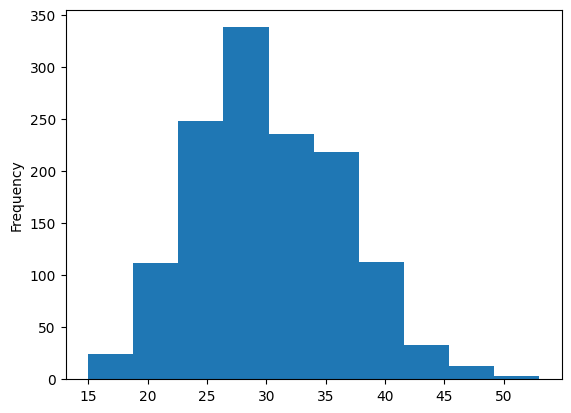

In [ ]:
X["bmi"].plot(kind = "hist")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
#read the csv file
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# #one-hot encoding in pandas dataframe
# insurance_onehot = pd.get_dummies(insurance, dtype=int)

# insurance_onehot = insurance_onehot.astype(int)

# insurance_onehot.head()

**Follow the following Docstring for make_column_transformer, MinMaxScaler, OneHotEncoder**  https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

In [ ]:

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

#create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

#making features
X = insurance.drop(["charges"], axis = 1)
#making labels
y = insurance["charges"]

#make training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state = 42)

#fit the column transformer on training data

ct.fit(X_train)

#transform training data X_train and test data y_test with normalization(MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.7826087 , 0.49001137, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [ ]:
X_train.iloc[0,:]


age                54
sex            female
bmi              31.9
children            1
smoker             no
region      southeast
Name: 1069, dtype: object

###MODEL 4

In [ ]:
#build a model

tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

insurance_model_4.fit(tf.expand_dims(X_train_normal, axis = -1), y_train, epochs = 200)


Epoch 1/200
9/9 [==============================] - 2s 4ms/step - loss: 13110.9424 - mae: 13110.9424
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 13110.5469 - mae: 13110.5469
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 13110.0996 - mae: 13110.0996
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 13109.5586 - mae: 13109.5586
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 13108.8848 - mae: 13108.8848
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 13108.0312 - mae: 13108.0312
Epoch 7/200
9/9 [==============================] - 0s 4ms/step - loss: 13106.9512 - mae: 13106.9512
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 13105.5918 - mae: 13105.5918
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 13103.9043 - mae: 13103.9043
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 13101.8291 - mae: 13101.8291

In [ ]:
insurance_model_4.evaluate(X_test_normal, y_test)

34/34 [==============================] - 0s 3ms/step - loss: 8456.9072 - mae: 8456.9072


[8456.9072265625, 8456.9072265625]

#PRACTICE

In [ ]:
recruitment = pd.read_csv("/content/recruitment_data.csv")
recruitment

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [ ]:
#one hot encoding is not required as there is no string

X = recruitment.drop(["HiringDecision"], axis = 1)
y = recruitment["HiringDecision"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 42)


In [ ]:
tf.random.set_seed(42)

recruitment_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10)

])

recruitment_model.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ["mae"])

recruitment_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
10/10 [==============================] - 1s 4ms/step - loss: 13.6604 - mae: 13.6604
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 9.7177 - mae: 9.7177
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 7.3338 - mae: 7.3338
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 5.5751 - mae: 5.5751
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 5.6008 - mae: 5.6008
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 4.7868 - mae: 4.7868
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 3.3844 - mae: 3.3844
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 4.6108 - mae: 4.6108
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 4.7446 - mae: 4.7446
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 3.9808 - mae: 3.9808


In [ ]:
recruitment_model.evaluate(X_test,y_test)

38/38 [==============================] - 0s 4ms/step - loss: 2.6535 - mae: 2.6535


[2.6535234451293945, 2.6535234451293945]

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
recruitment = pd.read_csv("/content/recruitment_data.csv")
recruitment.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [ ]:
#make a column transformer

ct = make_column_transformer(
    (MinMaxScaler(), ["Age","Gender", "EducationLevel", "ExperienceYears", "PreviousCompanies", "DistanceFromCompany", "InterviewScore","SkillScore", "PersonalityScore", "RecruitmentStrategy"])
)

X= recruitment.drop(["HiringDecision"], axis = 1)
y = recruitment["HiringDecision"]


X_train,X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state = 42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)



In [ ]:
tf.random.set_seed(42)

recruitment_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10)

])

recruitment_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ["mae"])

recruitment_model_2.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
10/10 [==============================] - 1s 6ms/step - loss: 0.4816 - mae: 0.4816
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4490 - mae: 0.4490
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4299 - mae: 0.4299
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4185 - mae: 0.4185
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.4124 - mae: 0.4124
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4090 - mae: 0.4090
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4065 - mae: 0.4065
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4045 - mae: 0.4045
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4029 - mae: 0.4029
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.4014 - mae: 0.4014
Epoch 11/100
10/10 [==============================] - 0s 5m

In [ ]:
recruitment_model_2.evaluate(X_test, y_test)

38/38 [==============================] - 0s 2ms/step - loss: 18.1405 - mae: 18.1405


[18.140459060668945, 18.140459060668945]